# Data Science in a Day

## Problem statement
Given data on loans that we've given in the past, we want to be able to predict whether a new customer should be given a loan or not. This is to aid decision making when it comes to offering loans at our bank.

## Loading Libraries

In [1]:
# Pandas - for data reading, manipulating, writing, analysis, and some plotting!
import pandas as pd 

# Numpy - for mathematical and matrix operations
import numpy as np

# Seaborn - for data visualisation
import seaborn as sns

# For visualising decision tree
import pydotplus
import graphviz 

# Import Decision tree from sklearn 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# For splitting our data into training and testing datasets
from sklearn.model_selection import train_test_split

# For evaluating our models
from sklearn.metrics import classification_report, confusion_matrix  

# To produe graphs here in our notebook
%matplotlib inline

## Data Reading and Preparation

In [2]:
# Let's start by loading our .csv file into our Jupyter notebook
loan = pd.read_csv('loan_data.csv')

Let's explore the dimensions of the data a little bit more

In [3]:
# Print the first 5 rows of the dataframe
loan.head()

# Anyone guess what the command for getting the last 5 rows is?
# loan_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Get dimensions of training dataframe
loan.shape

(981, 13)

In [5]:
# Get high-level information on the columns
loan.info() 

# Explain all this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               968 non-null object
Married              978 non-null object
Dependents           966 non-null object
Education            981 non-null object
Self_Employed        949 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           959 non-null float64
Loan_Amount_Term     967 non-null float64
Credit_History       931 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [6]:
# Maybe we want to get some descriptive statistics of the numerical features? Try doing this on your own (Google)
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,959.000000,967.000000,931.000000
mean,5179.795107,1601.916330,141.768509,340.078594,0.809882
std,5695.104533,2718.772806,77.899222,70.246667,0.392605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Data Cleaning
1) Are there any missing/NA values?

--> if so, how do we deal with them?

In [7]:
# Use the .isnull() function to return values in the dataframe which are Null/NA. Get first 5 rows of dataframe 
# only
loan.isnull().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Let's get the the sum of NA values in each of the columns/features
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now that we have an idea of where our NA values our located, how do we deal with them?


**Note** We engage the learners before each of the following blocks to get them thinking of best approaches

**Note2** These are our assumptions. In data cleaning you make assumptions based on common sense, and domain knowledge. The following is just how I did it -  learners can choose to clean their data differently, e.g. some may choose to delete all rows with ANY NAs, and that's fine! It's their model in the end, they're the data scientists responsible for it. 

One way that worked was to ask before dealing with each variable: who thinks we should delete the rows? (hands up) Who thinks we should replace them with someything? Ask why in each case to get them thinking. 

In [9]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# 1) Dealing with Gender, Married, Loan_Amount_Term ==> We remove those rows because they don't make sense!
loan.dropna(subset= ['Gender', 'Married', 'Loan_Amount_Term'], how = 'any', inplace= True)

In [11]:
# FOR DEPENDENTS -- it makes sense to fill NA dependents with 0
loan['Dependents'] = loan['Dependents'].fillna('0')

In [12]:
# FOR Self-Employed -- it makes sense to fill NA Self-employed values with 0
loan['Self_Employed'] = loan['Self_Employed'].fillna('No')

In [13]:
# FOR LOAN_AMount -- it makes sense to fill NA loans with 0
loan['LoanAmount'] = loan['LoanAmount'].fillna(float(0))   # or 0.0

In [14]:
# For Credit History - same
loan['Credit_History'] = loan['Credit_History'].fillna(0.0)

In [15]:
# Find sum of NA values in each column/feature
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# Let's check the dimensions now that we've done a bit of cleaning
loan.shape

(951, 13)

## Data Exploration


**Note** No need to go through each of the following visualisation examples, just two is enough. Purpose is to show what we can do -- esp. with seaborn vs. pandas. If you can spare 5 mins, it may be worth asking them to -- in pairs -- build any of the following visualisations on their own (basically, let them google it and see for themselves, and then type it out at the end of the 5 mins).

**Note 2** Stick to Seaborn for visualisation so syntax is consistent -- no need to include matplotlib as it has different (and slightly less intuitive syntax).

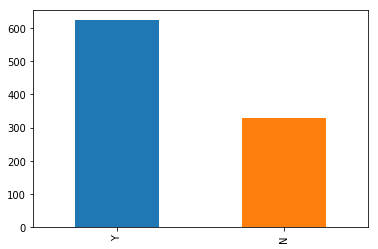

In [17]:
# Using pandas plot function 
loan.Loan_Status.value_counts().plot(kind = 'bar')

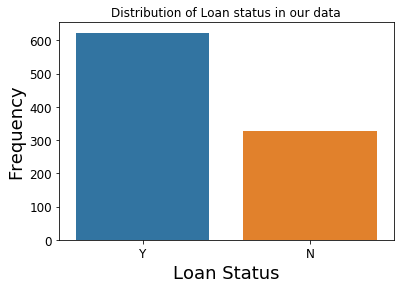

In [18]:
# Using seaborn instead - a library built for data visualisation
l_status = sns.countplot(x = 'Loan_Status', data = loan)

l_status.set_title('Distribution of Loan status in our data')  # First, type variable name, and press tab --> 
                                                                #    Jupyter notebook is so useful!
l_status.set_ylabel('Frequency', fontsize = 18)
l_status.set_xlabel('Loan Status', fontsize = 18)
l_status.tick_params(labelsize = 12)

Text(0.5, 1.0, 'Loan Status and Gender')

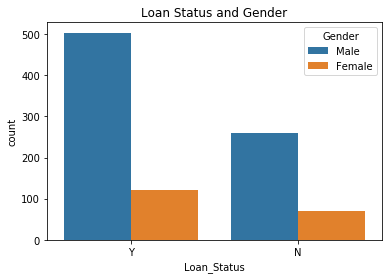

In [19]:
# Example 2: Countplot of Loan status while accounting for Gender
ls_gender = sns.countplot(x = 'Loan_Status', hue = 'Gender', data = loan)

ls_gender.set_title('Loan Status and Gender') 

Text(0.5, 1.0, 'Loan Status and Gender')

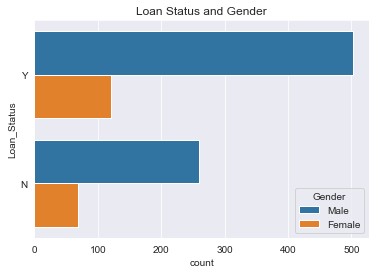

In [20]:
# Example 2.2 - maybe we want to graph horizontally instead?
 
sns.set_style('darkgrid') # or try 'whitegrid' (Basic point is seaborn is flexible style-wise)

ls_gender_horizontal = sns.countplot(y = 'Loan_Status', hue = 'Gender', data = loan, palette= None)

ls_gender_horizontal.set_title('Loan Status and Gender')

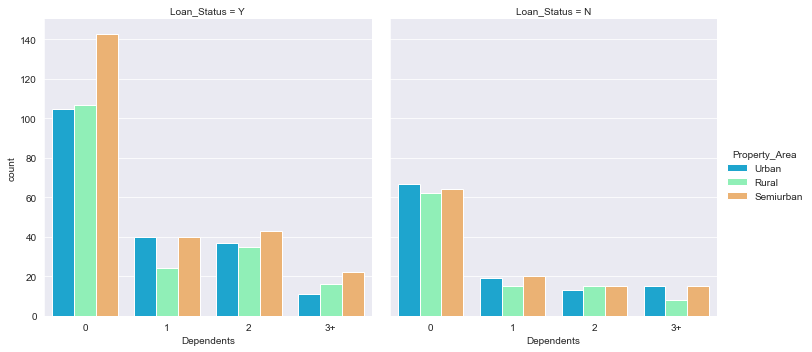

In [21]:
# Explore Property area and No. of dependents for both class values (i.e. Loan status = Yes, and Loan_Status = No)

area_gender = sns.catplot(x = 'Dependents', hue = 'Property_Area', col = 'Loan_Status', data = loan, kind = 'count', 
            palette= 'rainbow')

area_gender
# See if you can add a title, and change the font sizes of the X and Y labels

#### Explore other relationships using same syntax. 

With every graph, try adding a title, and changing the X and Y labels appropriately. Feel free to play around with seaborn palettes and styles!

In [22]:
# Comment 
# Let them tell you what to type.

## Building our model



We don't want to include the thing we want to predict as the input data, so lets drop it. Also let's put the classes into their own variable for convenience

In [23]:
# Python has many data types. Let's explore the distribution of different data types across our features.
loan.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [24]:
# Let's drop the ID column as it adds no useful information 
loan = loan.drop(['Loan_ID'], axis =1)

We now to split our data in several ways: 

1) We need to split by **features** (all columns but *Loan Status*) and our **target variable**, *Loan Status*


2) We need to split by rows into one dataset that we will train our model on -- **the training set** -- and one which our model will not see and on which we test performance -- **the testing set**.


In [25]:
# First we split by features and target variable

loan_feats = loan.drop(['Loan_Status'], axis= 1)

loan_class = loan['Loan_Status']

In [26]:
# Now we split into training and testing sets!
train_feats, test_feats, train_class, test_class = train_test_split(loan_feats, loan_class, test_size = 0.3, random_state = 123)



### EXPLAIN parameters

**Test size** =  how big is our test set -e.g. 0.3 of our data

**random_state**= explain that machine learning algorithms are stochastic (or probabilistic), meaning that there will always be a degree of randomness to them. Randomness can come from: 
- Which rows are used for training and testing. Some patterns are unique to some rows and if they're in the testing set, the ML algorithm will miss out on it.
- Some algorithms have random states - like initial neural network weights (do

**Note** 
Mention that we'll be using decision trees. The model we'll be using can't handle object (or non-numeric) data types!

==> Therefore, we'll need to convert all to numeric.

To transform the data into a form our Decision tree can use, we need to use **one hot encoding**. This basically means each value a feature can take, now becomes a column in its own right. 

**Note** Important to show shape before and after so it can sink in!

In [27]:
# One-hot encoding all features in training set
train_feats = pd.get_dummies(train_feats)

# One-hot encoding all features in testing set
test_feats = pd.get_dummies(test_feats)

In [28]:
# Let's see how the data looks after the transformation
train_feats.shape

(665, 20)

In [29]:
# And the same with the test set. Note that the same features were used, and hence the same output is expected.
test_feats.shape

(286, 20)

In [30]:
# See how columns look in training set
train_feats.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [31]:
# See how columns look in testing set
test_feats.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

Let's check if they're all numeric now

In [32]:
# Gloss over these different numeric data types
train_feats.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [33]:
# Convert target attribute values from Y/N to 1/0 -- training set
train_class = np.where(train_class == 'Y', 1,0)
train_class.dtype

dtype('int64')

In [34]:
# Convert target attribute values from Y/N to 1/0 -- testing set
test_class = np.where(test_class == 'Y', 1,0)
test_class.dtype

dtype('int64')

In [35]:
# Create the model! (Note use of sklearn)
tree_model = DecisionTreeClassifier()

# Now we fit/train it on our data. Mention X = train_feats, Y = train_class. 
tree_model.fit(train_feats, train_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
# Let's define a function for plotting our decision tree!
def plotTree():
    dot_data = export_graphviz(tree_model, 
                                    out_file=None, 
                                    feature_names=train_feats.columns,
                                    filled=True, 
                                    rounded=True)
    graph = graphviz.Source(dot_data)
    return graph 

# NOTE This is quite hard to follow. So mention that this will be explored in more detail in modules to come 
# (Classification specifically), but this session is meant illustrate ART OF THE POSSIBLE.

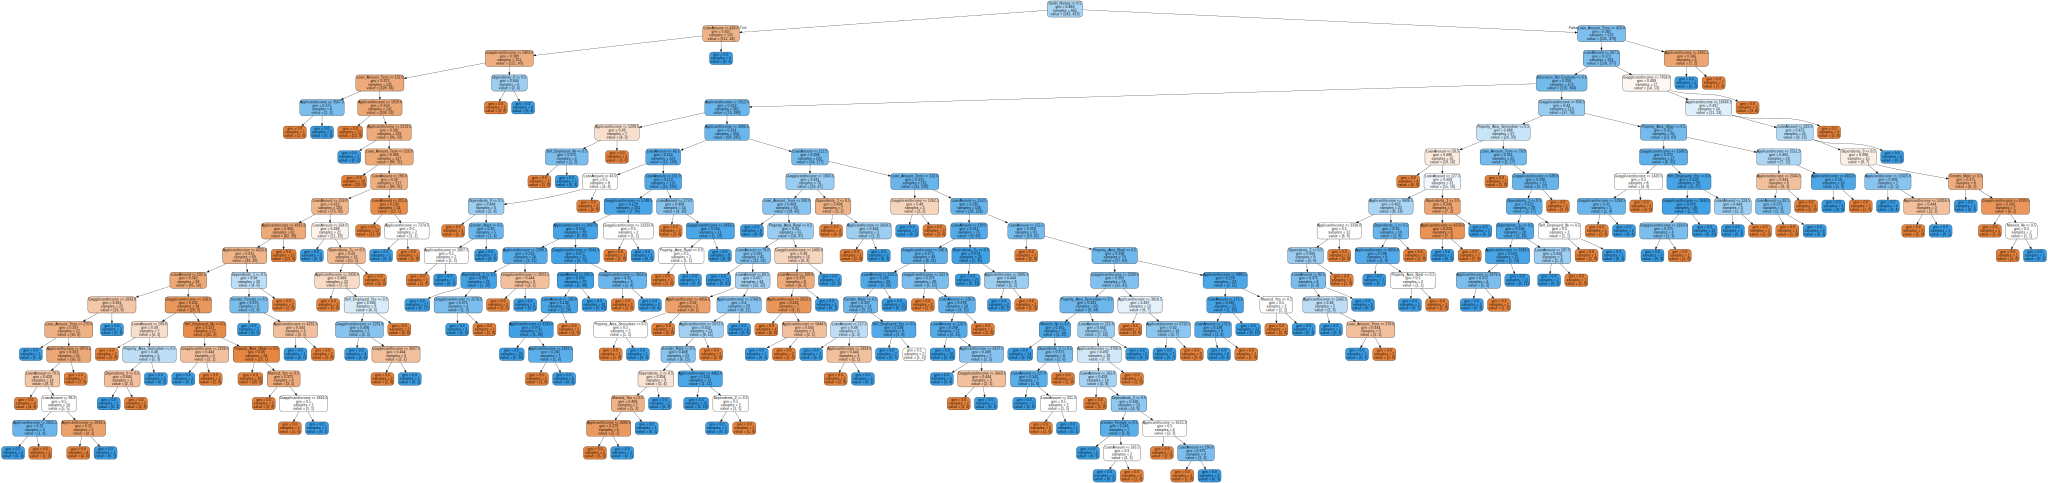

In [37]:
plotTree()

Huge tree! Very complex. Not very useful since it's not very understandable (defeating the original motive for
using a decision tree in the first place!). 

Let's try another tree. This time, let's set a limit to the **max_depth** parameter, to avoid creating a very complex tree.

In [38]:
# Creating model 2. Setting max_depth at 3 (arbitrary choice)
tree_model2 = DecisionTreeClassifier(max_depth= 3)

# Fitting the model to the same data as before
tree_model2.fit(train_feats, train_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

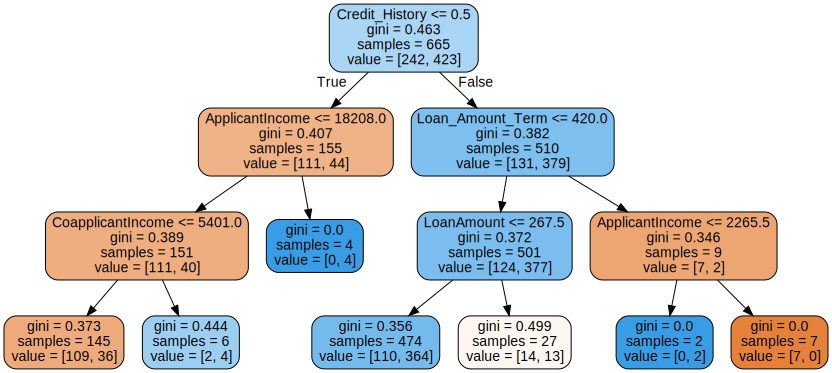

In [39]:
def plotTree2():
    dot_data = export_graphviz(tree_model2, 
                                    out_file=None, 
                                    feature_names=train_feats.columns,
                                    filled=True, 
                                    rounded=True)
    graph = graphviz.Source(dot_data)
    return graph 

plotTree2()

**Much better!**

### Making Predictions

Now that we've trained our models, it's time to put them to the test. We'll do this by predicting test set values and comparing those predictions to the values we already know are the ground truth. 

In [40]:
# Predictions made using model 1 (complex one)
predictions1 = tree_model.predict(test_feats)
predictions1

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

We need to compare those values with the test set!

In [41]:
# Let's evaluate how this model did
# Note - refer back to library call

print(confusion_matrix(test_class, predictions1))  
print(classification_report(test_class, predictions1))

[[ 38  48]
 [ 48 152]]
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        86
           1       0.76      0.76      0.76       200

   micro avg       0.66      0.66      0.66       286
   macro avg       0.60      0.60      0.60       286
weighted avg       0.66      0.66      0.66       286



In [42]:
# Making prediction using model 2 (simpler)
predictions2 = tree_model2.predict(test_feats)
predictions2

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [43]:
# Let's evaluate this model
print(confusion_matrix(test_class, predictions2))  
print(classification_report(test_class, predictions2))

[[ 39  47]
 [ 33 167]]
              precision    recall  f1-score   support

           0       0.54      0.45      0.49        86
           1       0.78      0.83      0.81       200

   micro avg       0.72      0.72      0.72       286
   macro avg       0.66      0.64      0.65       286
weighted avg       0.71      0.72      0.71       286



### Model Evaluation

Q: Which model is better? 
> A: Model 2 (less complex)


Q: Why though? Isn't the more complex model supposed to be better?
> A: Nope. Explain concept of variance vs. bias. Mention that decision trees are actually high variance models that overfit to our training data, and don't perform well on data they haven't seen (like the test set in our case)

Link to *Stupid Data Miner tricks paper* (Overfitting the S&P 500)
https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500